In [1]:
# import library, pandas to read the dataset and matplotlib to visualize data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Collect and Explore The Data

In [2]:
# read data using pd.read_csv, then store the data in df dataframe
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
# explore the data type at each series
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


The output of the cell above shows that:
The dataframe has 12 features (rows) which are:

1. id: which is (int) refers to the unique number for each row (key)
2. gender: gender of the patient which is (object) and has one value of "Male", "Female" or "Other"
3. age: the age of the patient as a float type
4. hypertension:  An (int) number (0 if the patient doesn't have hypertension and 1 if the patient has hypertension}.
5. heart_disease: An (int) number (0 if the patient doesn't have any heart diseases and 1 if the patient has a heart disease).
6. ever_married: An (object) value contains ("No" or "Yes")
7. work_type: An (object) value contains ("children", "Govt_jov", "Never_worked", "Private" or "Self-employed")
8. Residence_type: An (object) value contains ("Rural" or "Urban").
9. avg_glucose_level: A (float) number represents the average glucose level in blood.
10. bmi: A (float) number represents body mass index
11. smoking_status : An (object) value contains ("formerly smoked", "never smoked", "smokes" or "Unknown").
12. stroke: An (int) number (1 if the patient had a stroke, 0 the patient do not have a stroke).


# EDA

In [4]:
# chech if there is any problem in column names like spaces after or before
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
# check if there are any null values 
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

As a result of the last cell there are 201 missing values in bmi feature.
One of ways to deal with the missing values is to substitute missing values with mean of bmi 


In [6]:
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# check to null values again
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [8]:
# check how many unique id
df.id.nunique()

5110

5110 unique id equal to rows number so I will make sure there are no repeated data then no need to keep id column. 

In [9]:
# check if there is any duplicated row
df.duplicated().sum()

0

In [10]:
# drop id column from the dataframe
df = df.drop('id', axis=1)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [12]:
# go through each features values

for col in df.columns:
    print(df[col].value_counts())
    print("-----------------")

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
-----------------
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
0.48       3
1.40       3
0.16       3
0.08       2
0.40       2
Name: age, Length: 104, dtype: int64
-----------------
0    4612
1     498
Name: hypertension, dtype: int64
-----------------
0    4834
1     276
Name: heart_disease, dtype: int64
-----------------
Yes    3353
No     1757
Name: ever_married, dtype: int64
-----------------
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64
-----------------
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64
-----------------
93.88     6
72.49     5
84.10     5
91.68     5
83.16     5
         ..
95.02     1
120.09    1
197.58    1
99.91     1
60.50     1
Name: avg_glucose_level, Length: 3979, dtype: int64
-----------------
28.893237    201
28.700000     41
28.400000     38
26

from above we can find that:
- gender has one value 'Other'
- smoking_status has 1544 'Unknown' values

The output above shows that there is only one row has the value ('Other') compairing with more than 2100 for each male and female. To solve this outstanding between values we could replace the 'Other' value with mode of other values or remove the whole row. I chose the replacement. In addition, we have two option to deal with unknown value in smoking_status which are removing rows with unknown value or replace values with mode. I chose the second option.

In [13]:
# replace 'Other' values with mode
df['gender'] = df['gender'].replace('Other', list(df.gender.mode().values)[0])

In [14]:
# check gender values again
df.gender.value_counts()

Female    2995
Male      2115
Name: gender, dtype: int64

In [15]:
# replace Unknown value with mode
df["smoking_status"].replace("Unknown", df["smoking_status"].mode().values[0], inplace=True)

In [16]:
# check smoking_status values again
print(df["smoking_status"].value_counts())

never smoked       3436
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


In [17]:
# how many patient got stroke
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

# Visualize Data

C:\Users\tariq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


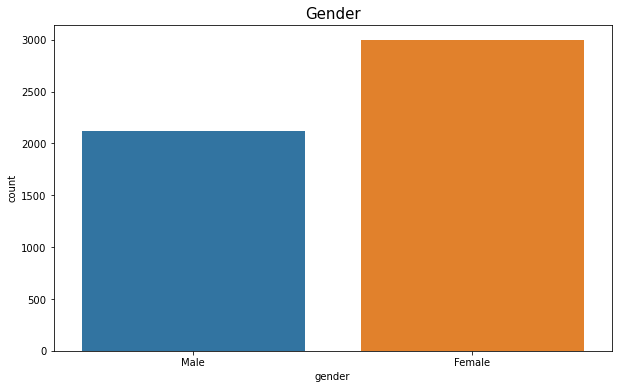

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df["gender"])
plt.title("Gender", size=15)
plt.show()

C:\Users\tariq\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


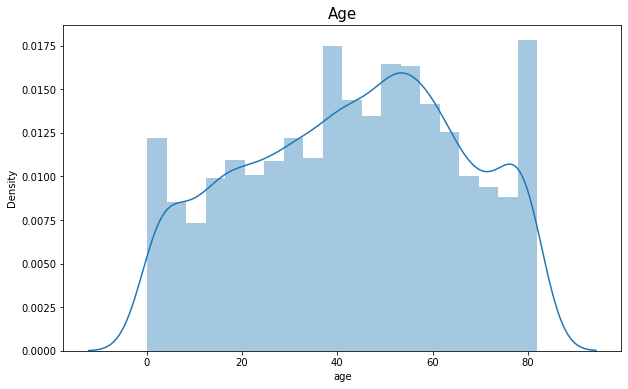

In [19]:
plt.figure(figsize=(10,6))
sns.distplot(df["age"])
plt.title("Age", size=15)
plt.show()

C:\Users\tariq\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


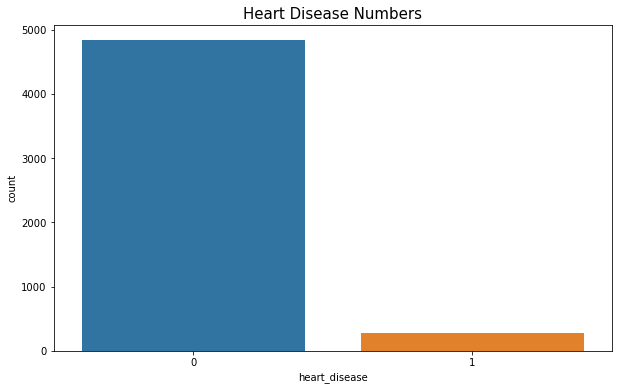

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(df["heart_disease"])
plt.title("Heart Disease Numbers", size=15)
plt.show()

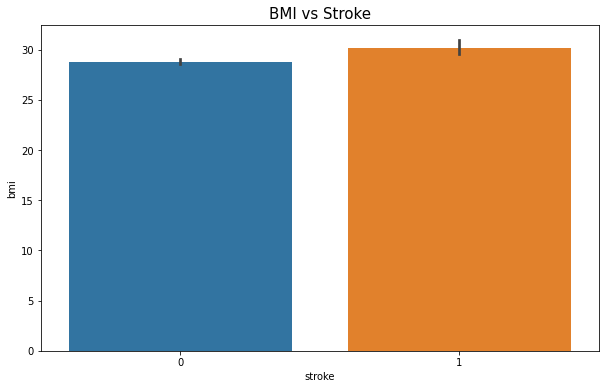

In [21]:
# BMI vs Stroke
plt.figure(figsize=(10,6))
sns.barplot(x=df["stroke"], y=df["bmi"])
plt.title("BMI vs Stroke", size=15)
plt.show()

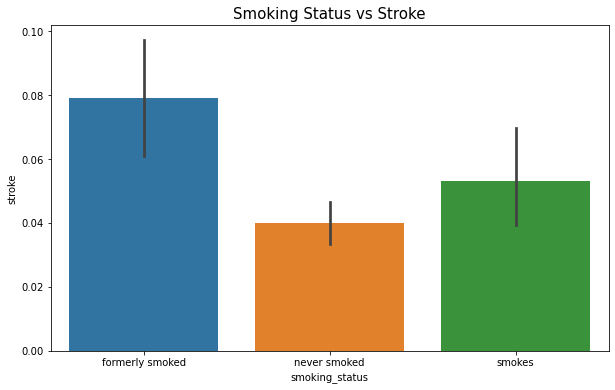

In [22]:
# Smoking Status vs Stroke
plt.figure(figsize=(10,6))
sns.barplot(x=df["smoking_status"], y=df["stroke"])
plt.title("Smoking Status vs Stroke", size=15)
plt.show()

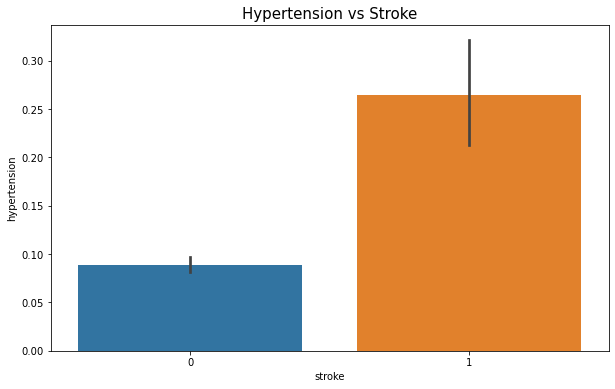

In [23]:
# Hypertension vs Stroke
plt.figure(figsize=(10,6))
sns.barplot(x=df["stroke"], y=df["hypertension"])
plt.title("Hypertension vs Stroke", size=15)
plt.show()

<AxesSubplot:>

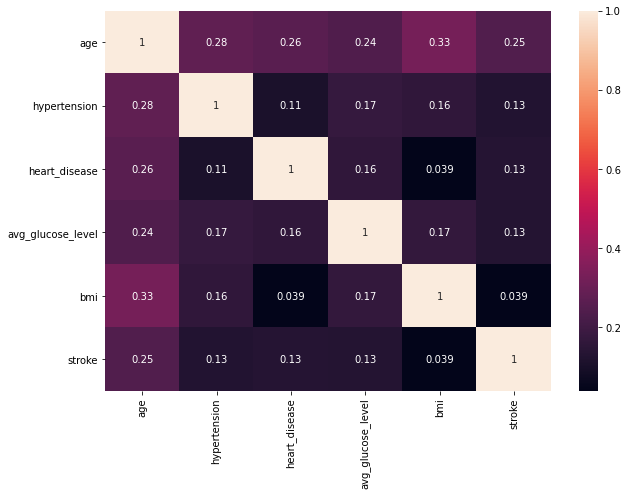

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True)

In [26]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,5110.0,28.893237,7.698018,10.30,23.800,28.400,32.80,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


In [28]:
num_cols=df.select_dtypes(include=['int64','float64'])
num_cols

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.600000,1
1,61.0,0,0,202.21,28.893237,1
2,80.0,0,1,105.92,32.500000,1
3,49.0,0,0,171.23,34.400000,1
4,79.0,1,0,174.12,24.000000,1
...,...,...,...,...,...,...
5105,80.0,1,0,83.75,28.893237,0
5106,81.0,0,0,125.20,40.000000,0
5107,35.0,0,0,82.99,30.600000,0
5108,51.0,0,0,166.29,25.600000,0


In [29]:
df.select_dtypes(exclude=['int64','float64'])

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [30]:
# convert categorical variables to numbers encoded  (0 or 1)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])

df_en = df
df_en.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,1,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,1,1


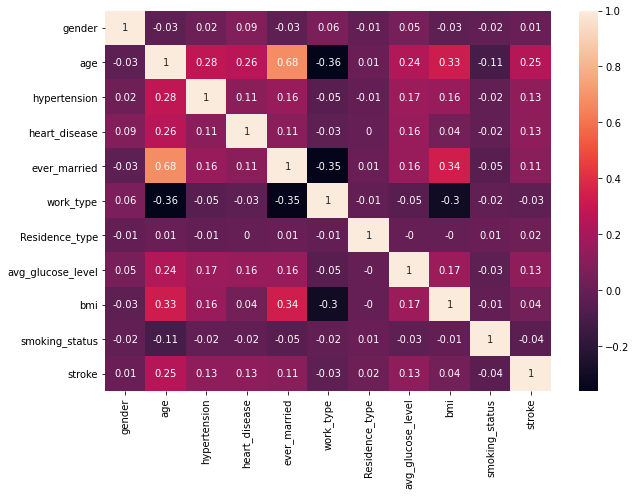

In [31]:
# Correlation of values with each other again
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True);

In [32]:
# scale 'avg_glucose_level','bmi',and 'age'
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.706375,1.001234e+00,1.051434
1,2.121559,1.384666e-15,0.786070
2,-0.005028,4.685773e-01,1.626390
3,1.437358,7.154182e-01,0.255342
4,1.501184,-6.357112e-01,1.582163


In [33]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke,avg_glucose_level,bmi,age
0,1,0,1,1,2,1,0,1,2.706375,1.001234e+00,1.051434
1,0,0,0,1,3,0,1,1,2.121559,1.384666e-15,0.786070
2,1,0,1,1,2,0,1,1,-0.005028,4.685773e-01,1.626390


# Modeling

In [34]:
# set X variables which is all columns eccept storke column and y as a target data
y = df["stroke"]
X = df.drop(["stroke"], axis=1)

In [35]:
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [36]:
y = pd.DataFrame(y, columns=["stroke"])

In [37]:
display(X.head())
display(y.head())

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,avg_glucose_level,bmi,age
0,1,0,1,1,2,1,0,2.706375,1.001234e+00,1.051434
1,0,0,0,1,3,0,1,2.121559,1.384666e-15,0.786070
2,1,0,1,1,2,0,1,-0.005028,4.685773e-01,1.626390
3,0,0,0,1,2,1,2,1.437358,7.154182e-01,0.255342
4,0,1,0,1,3,0,1,1.501184,-6.357112e-01,1.582163


,stroke
0,1
1,1
2,1
3,1
4,1


In [38]:
print(X.shape)
print(y.shape)

(5110, 10)
(5110, 1)


Splitting Data into Train, Test and Valiidation Datasets

In [39]:
from sklearn.model_selection import train_test_split
# splting data as 80% for training and 20 for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle = True, random_state = 8)
# takeing 20% of training data for validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state= 8) 

In [40]:
# chech sizes of traing, testing, and validation sets
print('X_train = ',X_train.shape)
print('y_train = ',y_train.shape)
print('X_test = ',X_test.shape)
print('y_test = ',y_test.shape)
print('X_val = ',X_val.shape)
print('y_val = ',y_val.shape)

X_train =  (3270, 10)
y_train =  (3270, 1)
X_test =  (1022, 10)
y_test =  (1022, 1)
X_val =  (818, 10)
y_val =  (818, 1)


I will apply Logistic Regression first ....

In [45]:
# Model
from sklearn.linear_model import LogisticRegression
